In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
train_dir = r'C:\Users\Janha\Dataset\Dataset\Train/'
test_dir = r'C:\Users\Janha\Dataset\Dataset\Test/' 

In [5]:
img_height = 128  
img_width = 128  
batch_size = 32 
num_classes = 2  
learning_rate = 0.001 
epochs = 20  


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2100 images belonging to 2 classes.
Found 700 images belonging to 2 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


C:\Users\Janha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

In [11]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 295ms/step - accuracy: 0.7010 - loss: 0.6589 - val_accuracy: 0.7057 - val_loss: 0.7828
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 275ms/step - accuracy: 0.8219 - loss: 0.4005 - val_accuracy: 0.7286 - val_loss: 0.6943
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 276ms/step - accuracy: 0.8312 - loss: 0.4245 - val_accuracy: 0.7100 - val_loss: 0.9705
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 293ms/step - accuracy: 0.8462 - loss: 0.3854 - val_accuracy: 0.7557 - val_loss: 0.6870
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 257ms/step - accuracy: 0.8619 - loss: 0.3336 - val_accuracy: 0.7414 - val_loss: 0.7162
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 257ms/step - accuracy: 0.9020 - loss: 0.2676 - val_accuracy: 0.7557 - val_loss: 0.6535
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - accuracy: 0.8842 - loss: 0.2985 - val_accuracy: 0.7443 - val_loss: 1.0494
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - accuracy: 0.9080 - loss: 0.2472 - val_accu

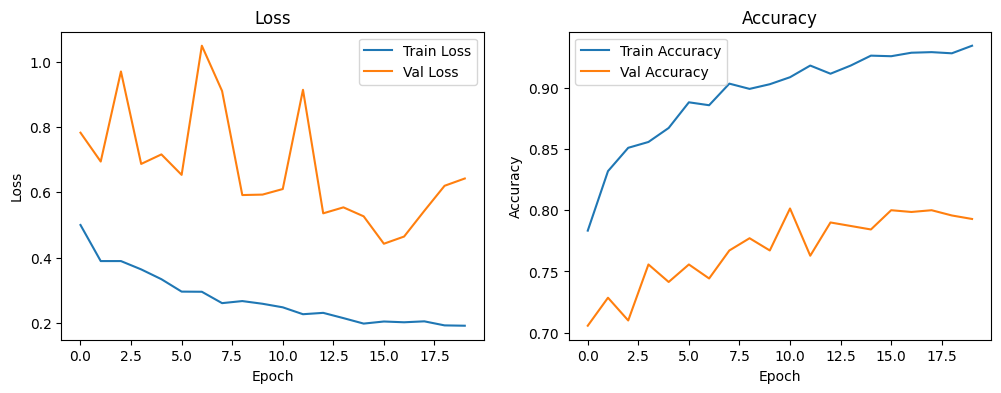

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [13]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7982 - loss: 0.4539
Test Loss: 0.4423321485519409
Test Accuracy: 0.800000011920929


In [14]:
model.save('keratoconus_cnn_model.h5')

print("Model saved successfully.")

Model saved successfully.
